In [1]:
from federated_learning.utils import SHAPUtil, VMUtil
from federated_learning import ClientPlane

In [ ]:
%load_ext autoreload
%autoreload 2

# Configuration

In [21]:
import os
import torch.nn as nn
from torch import device
from federated_learning.nets import MNISTFFNN, FMNISTCNN, FashionMNISTCNN
from federated_learning.dataset import MNISTDataset, FashionMNISTDataset
from federated_learning.client import FFNNClient, CNNClient

In [22]:
class Configuration():
    
    # Dataset Config
    BATCH_SIZE_TRAIN = 132
    BATCH_SIZE_TEST = 1000
    DATASET = FashionMNISTDataset
    
    #MNIST_FASHION_DATASET Configurations
    MNIST_FASHION_DATASET_PATH = os.path.join('./data/mnist_fashion')
    MNIST_FASHION_LABELS = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',  'Bag', 'Ankle Boot']
    
    #MNIST_DATASET Configurations
    MNIST_DATASET_PATH = os.path.join('./data/mnist')
    
    #CIFAR_DATASET Configurations
    CIFAR10_DATASET_PATH = os.path.join('./data/cifar10')
    CIFAR10_LABELS = ['Plane', 'Car', 'Bird', 'Cat','Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    #Model Training Configurations
    N_EPOCHS = 4
    LEARNING_RATE = 0.01
    MOMENTUM = 0.5
    LOG_INTERVAL = 10
    CRITERION = nn.CrossEntropyLoss
    NETWORK = FashionMNISTCNN
    NUMBER_TARGETS = 10
    
    #Local Environment Configurations
    NUMBER_OF_CLIENTS = 1
    CLIENT_TYPE = CNNClient
    DEVICE = device('cpu')
    
    #Label Flipping Attack
    DATA_POISONING_PERCENTAGE = 1
    FROM_LABEL = 5
    TO_LABEL = 4
    
    #Victoria Metrics Configurations
    VM_URL = os.getenv('VM_URL') #URL settings in docker-compose.yml

# Monitoring

In [ ]:
class Observer():
    pass

In [ ]:
class ClientObserver():

In [23]:
config = Configuration()
vm = VMUtil(config)
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader)
client_plane = ClientPlane(config, data, shap_util)

FashionMnist training data loaded.
FashionMnist training data loaded.
Create 1 clients


In [24]:
client_plane.clients[0].test()
for epoch in range(1, config.N_EPOCHS + 1):
    client_plane.clients[0].train(epoch)
    client_plane.clients[0].test()


Test set: Avg. loss: 2.3119, Accuracy: 816/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.370232
Train Epoch: 1 [1320/60000 (2%)]	Loss: 1.002306
Train Epoch: 1 [2640/60000 (4%)]	Loss: 0.805379
Train Epoch: 1 [3960/60000 (7%)]	Loss: 0.770834
Train Epoch: 1 [5280/60000 (9%)]	Loss: 0.635461
Train Epoch: 1 [6600/60000 (11%)]	Loss: 0.679747
Train Epoch: 1 [7920/60000 (13%)]	Loss: 0.580957
Train Epoch: 1 [9240/60000 (15%)]	Loss: 0.541921
Train Epoch: 1 [10560/60000 (18%)]	Loss: 0.504202
Train Epoch: 1 [11880/60000 (20%)]	Loss: 0.530849
Train Epoch: 1 [13200/60000 (22%)]	Loss: 0.436047
Train Epoch: 1 [14520/60000 (24%)]	Loss: 0.420196
Train Epoch: 1 [15840/60000 (26%)]	Loss: 0.463752
Train Epoch: 1 [17160/60000 (29%)]	Loss: 0.353691
Train Epoch: 1 [18480/60000 (31%)]	Loss: 0.367957
Train Epoch: 1 [19800/60000 (33%)]	Loss: 0.479011
Train Epoch: 1 [21120/60000 (35%)]	Loss: 0.458201
Train Epoch: 1 [22440/60000 (37%)]	Loss: 0.461618
Train Epoch: 1 [23760/60000 (40%)]	Loss: 0.446853
Train Epoc

In [25]:
client_plane.clients[0].analize()

In [26]:
client_plane.clients[0].confusion_matrix.sum(1) #recall 1 for row

tensor([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.])

In [27]:
client_plane.clients[0].confusion_matrix.sum(0) #precision 1 for collumn

tensor([ 4107.,  4161.,  4431.,  4175.,  4503.,  4166.,  5359.,  3900., 11133.,
         4065.])

In [28]:
client_plane.clients[0].accuracy

tensor(0.8946)

In [29]:
client_plane.clients[0].recall

tensor([0.6540, 0.7782, 0.6608, 0.7158, 0.6516, 0.7848, 0.5384, 0.7436, 0.9106,
        0.7726])

In [30]:
client_plane.clients[0].precision

tensor([0.7962, 0.9351, 0.7457, 0.8572, 0.7235, 0.9419, 0.5023, 0.9533, 0.4090,
        0.9503])

# SHAP Metrics

In [31]:
client_plane.clients[0].get_shap_values()
len(client_plane.clients[0].shap_values)

Predictions: tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])


10

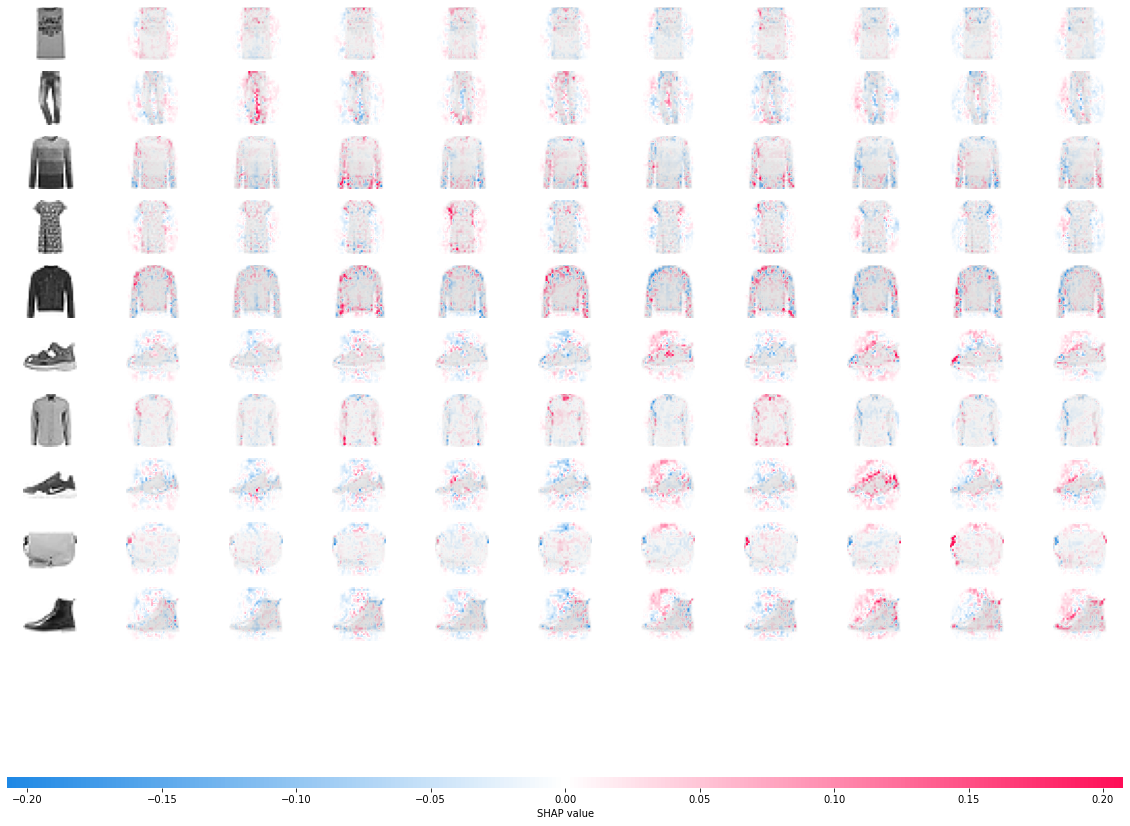

In [38]:
client_plane.clients[0].plot_shap_values("./test.png")

In [32]:
import numpy as np

In [43]:
for i in range(10):
    pos = np.sum(np.array(client_plane.clients[0].shap_values[i][1]) > 0)
    print(pos)

368
483
340
444
434
354
383
388
331
352


In [44]:
for i in range(10):
    neg = np.sum(np.array(client_plane.clients[0].shap_values[i][1]) < 0)
    print(neg)

401
286
429
325
335
415
386
381
438
417


In [ ]:
pos = np.sum(np.array(client_plane.clients[0].shap_values[0][0]) > 0)

In [35]:
neg = np.sum(np.array(client_plane.clients[0].shap_values[0][0]) < 0)

In [36]:
neu =np.sum(np.array(client_plane.clients[0].shap_values[0][0]) == 0)

In [ ]:
pos + neg + neu

In [ ]:
28*28 

In [46]:
import math
for i in range(10):
    val = [round(arr[np.nonzero(arr)].mean(), 4) for arr in client_plane.clients[0].shap_values[i]]
    val2 = [np.sum(np.array(arr) > 0) for arr in client_plane.clients[0].shap_values[i]]
    print(val, val2)

print(pos, neg, neu)

[0.0041, -0.0015, 0.0018, 0.003, 0.0011, -0.002, 0.0005, -0.0038, -0.0007, -0.0029] [480, 368, 437, 432, 397, 356, 397, 369, 378, 366]
[0.002, 0.0123, -0.0015, -0.0, -0.003, -0.0038, -0.0022, -0.006, -0.0022, -0.007] [417, 483, 375, 406, 341, 313, 344, 308, 367, 297]
[0.001, -0.0036, 0.01, -0.0021, 0.0085, -0.0017, 0.0041, -0.0033, -0.0026, -0.0034] [405, 340, 501, 382, 448, 364, 458, 356, 380, 340]
[0.0041, 0.003, -0.0022, 0.0108, -0.0061, -0.0028, -0.0018, -0.0011, -0.0041, -0.0051] [468, 444, 369, 524, 332, 359, 376, 383, 326, 331]
[-0.0019, 0.003, 0.004, -0.0028, 0.0098, -0.0064, 0.0067, -0.0074, -0.001, -0.006] [361, 434, 449, 386, 487, 335, 478, 335, 405, 340]
[-0.0044, -0.002, -0.0047, -0.0031, -0.0054, 0.0097, -0.0049, 0.0063, 0.0003, 0.0046] [298, 354, 298, 334, 325, 453, 286, 417, 372, 434]
[0.0022, -0.0036, 0.0052, 0.0006, 0.0038, -0.0055, 0.0111, -0.0045, -0.0004, -0.0048] [432, 383, 458, 416, 407, 360, 523, 371, 377, 341]
[-0.0006, -0.0031, -0.0077, -0.0017, -0.0059, 0.009

In [ ]:
arr = client_plane.clients[0].shap_values[4][4]
arr.mean()

In [ ]:
def analize_shap():
    pass